In [ ]:
import sys
import csv
import glob
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
from random import shuffle
import tensorflow as tf
from skimage.measure import block_reduce
from tensorflow import image
from sklearn.metrics import classification_report

from tensorflow.keras import activations
from keras.models import load_model
from keras.callbacks import EarlyStopping
import numpy as np


#Normalising data
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive'
!ls

/content/drive/MyDrive
 cat.jpg
'Colab Notebooks'
 dog.jpg
 Feature_selection.csv
 flowers
 mugpic.JPG
 output
 pencil.jpg
 PRSA_Data_Aotizhongxin_20130301-20170228.csv
 PRSA_Data_Changping_20130301-20170228.csv
 PRSA_Data_Dingling_20130301-20170228.csv
 PRSA_Data_Dongsi_20130301-20170228.csv
 PRSA_Data_Guanyuan_20130301-20170228.csv
 PRSA_Data_Gucheng_20130301-20170228.csv
 PRSA_Data_Huairou_20130301-20170228.csv
 PRSA_Data_Nongzhanguan_20130301-20170228.csv
 PRSA_Data_Shunyi_20130301-20170228.csv
 PRSA_Data_Tiantan_20130301-20170228.csv
 PRSA_Data_Wanliu_20130301-20170228.csv
 PRSA_Data_Wanshouxigong_20130301-20170228.csv
 RemainingSamples.cdb
'Test 20000.cdb'
'Train 60000.cdb'
'Untitled document (1).gdoc'
'Untitled document.gdoc'
'قالب تمرین.docx'


# Importing data

In [ ]:
Aotizhongxin = pd.read_csv('./PRSA_Data_Aotizhongxin_20130301-20170228.csv')
Changping = pd.read_csv('./PRSA_Data_Changping_20130301-20170228.csv')
Dingling = pd.read_csv('./PRSA_Data_Dingling_20130301-20170228.csv')
Dongsi = pd.read_csv('./PRSA_Data_Dingling_20130301-20170228.csv')
Guanyuan = pd.read_csv('./PRSA_Data_Guanyuan_20130301-20170228.csv')
Gucheng = pd.read_csv('./PRSA_Data_Gucheng_20130301-20170228.csv')
Huairou = pd.read_csv('./PRSA_Data_Huairou_20130301-20170228.csv')
Nongzhanguan = pd.read_csv('./PRSA_Data_Nongzhanguan_20130301-20170228.csv')
Shunyi = pd.read_csv('./PRSA_Data_Shunyi_20130301-20170228.csv')
Tiantan = pd.read_csv('./PRSA_Data_Tiantan_20130301-20170228.csv')
Wanliu = pd.read_csv('./PRSA_Data_Wanliu_20130301-20170228.csv')
Wanshouxigong = pd.read_csv('./PRSA_Data_Wanshouxigong_20130301-20170228.csv')

# Filling NaN values

In [ ]:
Aotizhongxin = Aotizhongxin.interpolate(method='linear')

In [ ]:
Changping['PM2.5']=Changping['PM2.5'].interpolate(method='linear', axis=0)
Dingling['PM2.5']=Dingling['PM2.5'].interpolate(method='linear', axis=0)
Dongsi['PM2.5']=Dongsi['PM2.5'].interpolate(method='linear', axis=0)
Guanyuan['PM2.5']=Guanyuan['PM2.5'].interpolate(method='linear', axis=0)
Gucheng['PM2.5']=Gucheng['PM2.5'].interpolate(method='linear', axis=0)
Huairou['PM2.5']=Huairou['PM2.5'].interpolate(method='linear', axis=0)
Nongzhanguan['PM2.5']=Nongzhanguan['PM2.5'].interpolate(method='linear', axis=0)
Shunyi['PM2.5']=Shunyi['PM2.5'].interpolate(method='linear', axis=0)
Tiantan['PM2.5']=Tiantan['PM2.5'].interpolate(method='linear', axis=0)
Wanliu['PM2.5']=Wanliu['PM2.5'].interpolate(method='linear', axis=0)
Wanshouxigong['PM2.5']=Wanshouxigong['PM2.5'].interpolate(method='linear', axis=0)

In [ ]:
Aotizhongxin['wd']==22.5

0        False
1        False
2        False
3        False
4        False
         ...  
35059    False
35060    False
35061    False
35062    False
35063    False
Name: wd, Length: 35064, dtype: bool

# Encoding Categorical Variable

In [ ]:
for i in range(len(Aotizhongxin['wd'])):
  temp = Aotizhongxin['wd'][i]
  final_temp = 0
  if (temp == 'N'):
    final_temp = 0
  if (temp == 'NNE'):
    final_temp = 22.5
  if (temp == 'NE'):
    final_temp = 45
  if (temp == 'ENE'):
    final_temp = 67.5
  if (temp == 'E'):
    final_temp = 90
  if (temp == 'ESE'):
    final_temp = 112.5
  if (temp == 'SE'):
    final_temp = 135
  if (temp == 'SSE'):
    final_temp = 157.5
  if (temp == 'S'):
    final_temp = 180
  if (temp == 'SSW'):
    final_temp = 202.5
  if (temp == 'SW'):
    final_temp = 225
  if (temp == 'WSW'):
    final_temp = 247.5
  if (temp == 'W'):
    final_temp = 270
  if (temp == 'WNW'):
    final_temp = 292.5
  if (temp == 'NW'):
    final_temp = 315
  if (temp == 'NNW'):
    final_temp = 337.5
  
  Aotizhongxin['wd'][i] = final_temp
Aotizhongxin['wd']=Aotizhongxin['wd'].interpolate(method='linear', axis=0)

<ipython-input-7-d5e164dc23e2>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Aotizhongxin['wd'][i] = final_temp


# Nomarlization

In [ ]:
Max_Aotizhongxin_pm = Aotizhongxin['PM2.5'].max()
Min_Aotizhongxin_pm = Aotizhongxin['PM2.5'].min()

for i in range(len(Aotizhongxin['PM2.5'])):
  temp = (Aotizhongxin['PM2.5'][i] - Min_Aotizhongxin_pm) / (Max_Aotizhongxin_pm - Min_Aotizhongxin_pm)
  Aotizhongxin['PM2.5'][i] = temp


<ipython-input-11-bc1f22032bd3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Aotizhongxin['PM2.5'][i] = temp


In [ ]:
Max_Changping_pm = Changping['PM2.5'].max()
Min_Changping_pm = Changping['PM2.5'].min()

for i in range(len(Changping['PM2.5'])):
  temp = (Changping['PM2.5'][i] - Min_Changping_pm) / (Max_Changping_pm - Min_Changping_pm)
  Changping['PM2.5'][i] = temp

<ipython-input-12-8b524d7f4037>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Changping['PM2.5'][i] = temp


In [ ]:
Max_Dingling_pm = Dingling['PM2.5'].max()
Min_Dingling_pm = Dingling['PM2.5'].min()

for i in range(len(Dingling['PM2.5'])):
  temp = (Dingling['PM2.5'][i] - Min_Dingling_pm) / (Max_Dingling_pm - Min_Dingling_pm)
  Dingling['PM2.5'][i] = temp

<ipython-input-13-c1e8bc4f7622>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dingling['PM2.5'][i] = temp


In [ ]:
Max_Dongsi_pm = Dongsi['PM2.5'].max()
Min_Dongsi_pm = Dongsi['PM2.5'].min()

for i in range(len(Dongsi['PM2.5'])):
  temp = (Dongsi['PM2.5'][i] - Min_Dongsi_pm) / (Max_Dongsi_pm - Min_Dongsi_pm)
  Dongsi['PM2.5'][i] = temp

<ipython-input-14-aa50c0b348fb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dongsi['PM2.5'][i] = temp


In [ ]:
Max_Guanyuan_pm = Guanyuan['PM2.5'].max()
Min_Guanyuan_pm = Guanyuan['PM2.5'].min()

for i in range(len(Guanyuan['PM2.5'])):
  temp = (Guanyuan['PM2.5'][i] - Min_Guanyuan_pm) / (Max_Guanyuan_pm - Min_Guanyuan_pm)
  Guanyuan['PM2.5'][i] = temp

<ipython-input-15-f4c6da787124>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Guanyuan['PM2.5'][i] = temp


In [ ]:
Max_Gucheng_pm = Gucheng['PM2.5'].max()
Min_Gucheng_pm = Gucheng['PM2.5'].min()

for i in range(len(Gucheng['PM2.5'])):
  temp = (Gucheng['PM2.5'][i] - Min_Gucheng_pm) / (Max_Gucheng_pm - Min_Gucheng_pm)
  Gucheng['PM2.5'][i] = temp

<ipython-input-16-1776b4dba9ee>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gucheng['PM2.5'][i] = temp


In [ ]:
Max_Huairou_pm = Huairou['PM2.5'].max()
Min_Huairou_pm = Huairou['PM2.5'].min()

for i in range(len(Huairou['PM2.5'])):
  temp = (Huairou['PM2.5'][i] - Min_Huairou_pm) / (Max_Huairou_pm - Min_Huairou_pm)
  Huairou['PM2.5'][i] = temp

<ipython-input-17-558e7a5eca81>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Huairou['PM2.5'][i] = temp


In [ ]:
Max_Nongzhanguan_pm = Nongzhanguan['PM2.5'].max()
Min_Nongzhanguan_pm = Nongzhanguan['PM2.5'].min()

for i in range(len(Nongzhanguan['PM2.5'])):
  temp = (Nongzhanguan['PM2.5'][i] - Min_Nongzhanguan_pm) / (Max_Nongzhanguan_pm - Min_Nongzhanguan_pm)
  Nongzhanguan['PM2.5'][i] = temp

<ipython-input-18-538c7f9ed4a6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nongzhanguan['PM2.5'][i] = temp


In [ ]:
Max_Shunyi_pm = Shunyi['PM2.5'].max()
Min_Shunyi_pm = Shunyi['PM2.5'].min()

for i in range(len(Shunyi['PM2.5'])):
  temp = (Shunyi['PM2.5'][i] - Min_Shunyi_pm) / (Max_Shunyi_pm - Min_Shunyi_pm)
  Shunyi['PM2.5'][i] = temp

<ipython-input-19-38cf57c7dd91>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Shunyi['PM2.5'][i] = temp


In [ ]:
Max_Tiantan_pm = Tiantan['PM2.5'].max()
Min_Tiantan_pm = Tiantan['PM2.5'].min()

for i in range(len(Tiantan['PM2.5'])):
  temp = (Tiantan['PM2.5'][i] - Min_Tiantan_pm) / (Max_Tiantan_pm - Min_Tiantan_pm)
  Tiantan['PM2.5'][i] = temp

<ipython-input-20-256f268760e6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tiantan['PM2.5'][i] = temp


In [ ]:
Max_Wanliu_pm = Wanliu['PM2.5'].max()
Min_Wanliu_pm = Wanliu['PM2.5'].min()

for i in range(len(Wanliu['PM2.5'])):
  temp = (Wanliu['PM2.5'][i] - Min_Wanliu_pm) / (Max_Wanliu_pm - Min_Wanliu_pm)
  Wanliu['PM2.5'][i] = temp

<ipython-input-21-bf6c9f695bfd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wanliu['PM2.5'][i] = temp


In [ ]:
Max_Wanshouxigong_pm = Wanshouxigong['PM2.5'].max()
Min_Wanshouxigong_pm = Wanshouxigong['PM2.5'].min()

for i in range(len(Wanshouxigong['PM2.5'])):
  temp = (Wanshouxigong['PM2.5'][i] - Min_Wanshouxigong_pm) / (Max_Wanshouxigong_pm - Min_Wanshouxigong_pm)
  Wanshouxigong['PM2.5'][i] = temp

<ipython-input-22-1cbc111e4d2d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wanshouxigong['PM2.5'][i] = temp


# Pearson correlation

In [ ]:
Pm25_list = pd.DataFrame(
    {'PM2.5': Aotizhongxin['PM2.5'],
     'PM2.5_Wans': Wanshouxigong['PM2.5'],
     'PM2.5_wanl':  Wanliu['PM2.5'],
     'PM2.5_Tian':  Tiantan['PM2.5'],
     'PM2.5_Shun':  Shunyi['PM2.5'],
     'PM2.5_Guch':  Gucheng['PM2.5'],
     'PM2.5_Huai':  Huairou['PM2.5'],
     'PM2.5_Guan':  Guanyuan['PM2.5'],
     'PM2.5_Dong':  Dongsi['PM2.5'],
     'PM2.5_Nong':  Nongzhanguan['PM2.5'],
     'PM2.5_Ding':  Dingling['PM2.5'],
     'PM2_Chan':  Changping['PM2.5']
    })

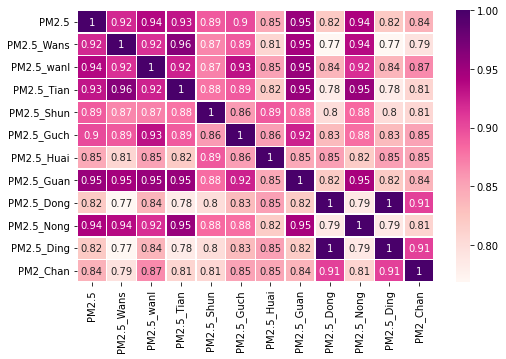

In [ ]:
import seaborn as sb
corr = Pm25_list.corr(method='pearson')
fig, ax = plt.subplots(figsize=(8,5))
sb.heatmap(corr, cmap="RdPu", annot=True,linewidths=.5, ax=ax)

# Making Excel

In [ ]:
Excel_df = pd.DataFrame(
    {'No': Aotizhongxin['No'],
     'year': Aotizhongxin['year'],
     'month':  Aotizhongxin['month'],
     'day':  Aotizhongxin['day'],
     'hour':  Aotizhongxin['hour'],
     'PM2.5_Wans': Wanshouxigong['PM2.5'],
     'PM2.5_wanl':  Wanliu['PM2.5'],
     'PM2.5_Tian':  Tiantan['PM2.5'],
     'PM2.5_Shun':  Shunyi['PM2.5'],
     'PM2.5_Guch':  Gucheng['PM2.5'],
     'PM2.5_Huai':  Huairou['PM2.5'],
     'PM2.5_Guan':  Guanyuan['PM2.5'],
     'PM2.5_Dong':  Dongsi['PM2.5'],
     'PM2.5_Nong':  Nongzhanguan['PM2.5'],
     'PM2.5_Ding':  Dingling['PM2.5'],
     'PM2.5_Chan':  Changping['PM2.5'],
     'PM10_Aotizh': Aotizhongxin['PM10'],
     'CO_Aotizh': Aotizhongxin['CO'],
     'TEMP_Aotizh': Aotizhongxin['TEMP'],
     'PRES_Aotizh': Aotizhongxin['PRES'],
     'DEWP_Aotizh': Aotizhongxin['DEWP'],
     'RAIN_Aotizh': Aotizhongxin['RAIN'],
     'WSPM_Aotizh': Aotizhongxin['WSPM'],
     'wd_Aotizh': Aotizhongxin['wd'],
     'PM2.5_Aotizh': Aotizhongxin['PM2.5'],
    })

In [40]:
Excel_df.to_csv('/content/drive/My Drive/Feature_selection.csv', encoding='utf-8', index=False)

## Train and Test Split

In [ ]:
Excel_df

,No,year,month,day,hour,PM2.5_Wans,PM2.5_wanl,PM2.5_Tian,PM2.5_Shun,PM2.5_Guch,...,PM2.5_Chan,PM10_Aotizh,CO_Aotizh,TEMP_Aotizh,PRES_Aotizh,DEWP_Aotizh,RAIN_Aotizh,WSPM_Aotizh,wd_Aotizh,PM2.5_Aotizh
0,1,2013,3,1,0,9.0,8.0,6.0,3.0,6.0,...,3.0,4.0,300.0,-0.7,1023.0,-18.8,0.0,4.4,337.5,4.0
1,2,2013,3,1,1,11.0,9.0,6.0,12.0,6.0,...,3.0,8.0,300.0,-1.1,1023.2,-18.2,0.0,4.7,0,8.0
2,3,2013,3,1,2,8.0,3.0,6.0,14.0,5.0,...,3.0,7.0,300.0,-1.1,1023.5,-18.2,0.0,5.6,337.5,7.0
3,4,2013,3,1,3,8.0,11.0,6.0,12.0,6.0,...,3.0,6.0,300.0,-1.4,1024.5,-19.4,0.0,3.1,315,6.0
4,5,2013,3,1,4,8.0,3.0,5.0,12.0,5.0,...,3.0,3.0,300.0,-2.0,1025.2,-19.5,0.0,2.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,20.0,27.0,14.0,...,28.0,29.0,400.0,12.5,1013.5,-16.2,0.0,2.4,315,12.0
35060,35061,2017,2,28,20,13.0,15.0,11.0,47.0,27.0,...,12.0,37.0,500.0,11.6,1013.6,-15.1,0.0,0.9,292.5,13.0
35061,35062,2017,2,28,21,14.0,13.0,18.0,18.0,22.0,...,7.0,37.0,700.0,10.8,1014.2,-13.3,0.0,1.1,315,16.0
35062,35063,2017,2,28,22,12.0,12.0,15.0,18.0,9.0,...,11.0,44.0,700.0,10.5,1014.4,-12.9,0.0,1.2,337.5,21.0


## Lag = 1 days

In [ ]:
def to_supervised(train):
  window_size = 24
  X = []
  Y = []
  i=0
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,5:25])
    Y.append(train[i,-1])
    
  return X,Y

X, Y = to_supervised(values)
X = np.asarray(X).astype('float32')
Y = np.asarray(Y).astype('float32')
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (35040,)
X (35040, 24, 20)


In [ ]:
n_train = 6988
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (28052, 24, 20)
X_test (6988, 24, 20)
Y_train (28052,)
Y_test (6988,)


CNN-LSTM Network

In [ ]:
model = Sequential()
model.add(layers.Conv1D(64, 3, padding='causal',activation="relu", input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(layers.BatchNormalization())

model.add(layers.Conv1D(64, 3, padding='causal',activation="relu"))
model.add(layers.BatchNormalization())

model.add(layers.Conv1D(32, 3, padding='causal',activation="relu"))

model.add(layers.MaxPooling1D(pool_size=3))


model.add(tf.keras.layers.LSTM(units=100,dropout=0.2,return_sequences = True))
model.add(tf.keras.layers.LSTM(units=50,dropout=0.3))
model.add(layers.Dense(units=1, activation="relu"))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            3904      
                                                                 
 batch_normalization (BatchN  (None, 24, 64)           256       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 24, 64)            12352     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 64)           256       
 hNormalization)                                                 
                                                                 
 conv1d_2 (Conv1D)           (None, 24, 32)            6176      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 8, 32)            0

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001,decay=0.0001)
model.compile(loss='mean_squared_error', optimizer=opt)
es = EarlyStopping(min_delta = 1e-3,patience = 50)
model.fit(X_train, Y_train, batch_size=32, epochs=200, callbacks=[es])

Epoch 1/200
877/877 [==============================] - ETA: 0s - loss: 10200.8965

877/877 [==============================] - 14s 9ms/step - loss: 10200.8965
Epoch 2/200
877/877 [==============================] - ETA: 0s - loss: 7772.9531

877/877 [==============================] - 8s 9ms/step - loss: 7772.9531
Epoch 3/200
874/877 [============================>.] - ETA: 0s - loss: 5942.2007

877/877 [==============================] - 8s 9ms/step - loss: 5930.3042
Epoch 4/200
874/877 [============================>.] - ETA: 0s - loss: 4250.8413

877/877 [==============================] - 8s 9ms/step - loss: 4253.8052
Epoch 5/200
877/877 [==============================] - ETA: 0s - loss: 3349.9282

877/877 [==============================] - 8s 9ms/step - loss: 3349.9282
Epoch 6/200
876/877 [============================>.] - ETA: 0s - loss: 2747.7722

877/877 [==============================] - 8s 9ms/step - loss: 2746.9531
Epoch 7/200
875/877 [============================>.] - ETA: 0s - loss: 2298.7063

877/877 [==============================] - 9s 10ms/step - loss: 2304.2898
Epoch 8/200
872/877 [============================>.] - ETA: 0s - loss: 1956.0581

877/877 [==============================] - 8s 9ms/step - loss: 1954.6042
Epoch 9/200
877/877 [==============================] - ETA: 0s - loss: 1698.7743

877/877 [==============================] - 8s 9ms/step - loss: 1698.7743
Epoch 10/200
874/877 [============================>.] - ETA: 0s - loss: 1482.3984

877/877 [==============================] - 8s 9ms/step - loss: 1492.6261
Epoch 11/200
876/877 [============================>.] - ETA: 0s - loss: 1339.5413

877/877 [==============================] - 8s 9ms/step - loss: 1338.9399
Epoch 12/200
872/877 [============================>.] - ETA: 0s - loss: 1208.0281

877/877 [==============================] - 8s 9ms/step - loss: 1203.9443
Epoch 13/200
874/877 [============================>.] - ETA: 0s - loss: 1113.2494

877/877 [==============================] - 8s 9ms/step - loss: 1112.3472
Epoch 14/200
875/877 [============================>.] - ETA: 0s - loss: 1008.4667

877/877 [==============================] - 8s 9ms/step - loss: 1013.9563
Epoch 15/200
873/877 [============================>.] - ETA: 0s - loss: 943.9127

877/877 [==============================] - 8s 9ms/step - loss: 940.9651
Epoch 16/200
872/877 [============================>.] - ETA: 0s - loss: 872.4384

877/877 [==============================] - 8s 9ms/step - loss: 871.0590
Epoch 17/200
877/877 [==============================] - ETA: 0s - loss: 805.4988

877/877 [==============================] - 8s 9ms/step - loss: 805.4988
Epoch 18/200
874/877 [============================>.] - ETA: 0s - loss: 772.5109

877/877 [==============================] - 8s 9ms/step - loss: 771.7229
Epoch 19/200
872/877 [============================>.] - ETA: 0s - loss: 730.9585

877/877 [==============================] - 8s 9ms/step - loss: 728.9777
Epoch 20/200
877/877 [==============================] - ETA: 0s - loss: 709.0045

877/877 [==============================] - 8s 9ms/step - loss: 709.0045
Epoch 21/200
875/877 [============================>.] - ETA: 0s - loss: 654.7784

877/877 [==============================] - 9s 10ms/step - loss: 655.0923
Epoch 22/200
876/877 [============================>.] - ETA: 0s - loss: 632.4332

877/877 [==============================] - 8s 9ms/step - loss: 632.1777
Epoch 23/200
874/877 [============================>.] - ETA: 0s - loss: 607.1514

877/877 [==============================] - 8s 9ms/step - loss: 612.5911
Epoch 24/200
875/877 [============================>.] - ETA: 0s - loss: 587.7061

877/877 [==============================] - 8s 9ms/step - loss: 586.8770
Epoch 25/200
874/877 [============================>.] - ETA: 0s - loss: 562.0905

877/877 [==============================] - 8s 9ms/step - loss: 562.4459
Epoch 26/200
874/877 [============================>.] - ETA: 0s - loss: 542.6276

877/877 [==============================] - 8s 9ms/step - loss: 555.8983
Epoch 27/200
876/877 [============================>.] - ETA: 0s - loss: 534.3170

877/877 [==============================] - 8s 9ms/step - loss: 535.4155
Epoch 28/200
874/877 [============================>.] - ETA: 0s - loss: 522.8361

877/877 [==============================] - 8s 9ms/step - loss: 522.5949
Epoch 29/200
873/877 [============================>.] - ETA: 0s - loss: 522.4142

877/877 [==============================] - 8s 9ms/step - loss: 521.0294
Epoch 30/200
873/877 [============================>.] - ETA: 0s - loss: 500.0105

877/877 [==============================] - 8s 9ms/step - loss: 499.8459
Epoch 31/200
873/877 [============================>.] - ETA: 0s - loss: 483.2156

877/877 [==============================] - 8s 9ms/step - loss: 483.1385
Epoch 32/200
873/877 [============================>.] - ETA: 0s - loss: 470.3605

877/877 [==============================] - 8s 9ms/step - loss: 474.0399
Epoch 33/200
875/877 [============================>.] - ETA: 0s - loss: 461.9053

877/877 [==============================] - 8s 9ms/step - loss: 461.5888
Epoch 34/200
873/877 [============================>.] - ETA: 0s - loss: 457.0080

877/877 [==============================] - 8s 9ms/step - loss: 456.4640
Epoch 35/200
875/877 [============================>.] - ETA: 0s - loss: 444.3314

877/877 [==============================] - 9s 10ms/step - loss: 443.9456
Epoch 36/200
872/877 [============================>.] - ETA: 0s - loss: 427.5935

877/877 [==============================] - 8s 9ms/step - loss: 428.5461
Epoch 37/200
874/877 [============================>.] - ETA: 0s - loss: 431.5762

877/877 [==============================] - 8s 9ms/step - loss: 430.9751
Epoch 38/200
874/877 [============================>.] - ETA: 0s - loss: 417.1286

877/877 [==============================] - 8s 9ms/step - loss: 417.2727
Epoch 39/200
872/877 [============================>.] - ETA: 0s - loss: 411.7792

877/877 [==============================] - 8s 9ms/step - loss: 411.1039
Epoch 40/200
877/877 [==============================] - ETA: 0s - loss: 398.6388

877/877 [==============================] - 8s 9ms/step - loss: 398.6388
Epoch 41/200
874/877 [============================>.] - ETA: 0s - loss: 396.2975

877/877 [==============================] - 8s 9ms/step - loss: 397.9291
Epoch 42/200
872/877 [============================>.] - ETA: 0s - loss: 394.1844

877/877 [==============================] - 8s 9ms/step - loss: 393.6840
Epoch 43/200
874/877 [============================>.] - ETA: 0s - loss: 386.5847

877/877 [==============================] - 8s 9ms/step - loss: 386.0904
Epoch 44/200
874/877 [============================>.] - ETA: 0s - loss: 378.9577

877/877 [==============================] - 8s 9ms/step - loss: 379.0795
Epoch 45/200
871/877 [============================>.] - ETA: 0s - loss: 377.0277

877/877 [==============================] - 8s 9ms/step - loss: 376.4924
Epoch 46/200
874/877 [============================>.] - ETA: 0s - loss: 378.8743

877/877 [==============================] - 8s 9ms/step - loss: 378.3681
Epoch 47/200
873/877 [============================>.] - ETA: 0s - loss: 368.0072

877/877 [==============================] - 8s 9ms/step - loss: 367.2274
Epoch 48/200
872/877 [============================>.] - ETA: 0s - loss: 361.0154

877/877 [==============================] - 8s 9ms/step - loss: 361.3192
Epoch 49/200
875/877 [============================>.] - ETA: 0s - loss: 367.0859

877/877 [==============================] - 9s 10ms/step - loss: 366.9194
Epoch 50/200
876/877 [============================>.] - ETA: 0s - loss: 355.0788

877/877 [==============================] - 8s 9ms/step - loss: 354.8976
Epoch 51/200
877/877 [==============================] - ETA: 0s - loss: 352.5586

877/877 [==============================] - 8s 9ms/step - loss: 352.5586
Epoch 52/200
875/877 [============================>.] - ETA: 0s - loss: 355.1978

877/877 [==============================] - 8s 9ms/step - loss: 354.9746
Epoch 53/200
877/877 [==============================] - ETA: 0s - loss: 344.8542

877/877 [==============================] - 8s 9ms/step - loss: 344.8542
Epoch 54/200
873/877 [============================>.] - ETA: 0s - loss: 344.1157

877/877 [==============================] - 8s 9ms/step - loss: 343.4018
Epoch 55/200
873/877 [============================>.] - ETA: 0s - loss: 339.7491

877/877 [==============================] - 8s 9ms/step - loss: 339.1644
Epoch 56/200
877/877 [==============================] - ETA: 0s - loss: 340.0958

877/877 [==============================] - 8s 9ms/step - loss: 340.0958
Epoch 57/200
876/877 [============================>.] - ETA: 0s - loss: 333.2365

877/877 [==============================] - 8s 9ms/step - loss: 333.0815
Epoch 58/200
875/877 [============================>.] - ETA: 0s - loss: 331.6294

877/877 [==============================] - 8s 9ms/step - loss: 331.4283
Epoch 59/200
874/877 [============================>.] - ETA: 0s - loss: 329.2625

877/877 [==============================] - 8s 9ms/step - loss: 328.9153
Epoch 60/200
876/877 [============================>.] - ETA: 0s - loss: 324.0251

877/877 [==============================] - 8s 9ms/step - loss: 323.9795
Epoch 61/200
877/877 [==============================] - ETA: 0s - loss: 325.0357

877/877 [==============================] - 8s 9ms/step - loss: 325.0357
Epoch 62/200
874/877 [============================>.] - ETA: 0s - loss: 322.2789

877/877 [==============================] - 8s 9ms/step - loss: 322.1260
Epoch 63/200
876/877 [============================>.] - ETA: 0s - loss: 313.0565

877/877 [==============================] - 9s 10ms/step - loss: 313.1423
Epoch 64/200
874/877 [============================>.] - ETA: 0s - loss: 313.1365

877/877 [==============================] - 8s 9ms/step - loss: 313.2153
Epoch 65/200
875/877 [============================>.] - ETA: 0s - loss: 307.5219

877/877 [==============================] - 8s 9ms/step - loss: 307.6079
Epoch 66/200
873/877 [============================>.] - ETA: 0s - loss: 308.7327

877/877 [==============================] - 8s 9ms/step - loss: 308.1118
Epoch 67/200
877/877 [==============================] - ETA: 0s - loss: 311.2445

877/877 [==============================] - 8s 9ms/step - loss: 311.2445
Epoch 68/200
874/877 [============================>.] - ETA: 0s - loss: 316.1106

877/877 [==============================] - 8s 9ms/step - loss: 315.7840
Epoch 69/200
873/877 [============================>.] - ETA: 0s - loss: 296.9664

877/877 [==============================] - 8s 9ms/step - loss: 296.3367
Epoch 70/200
876/877 [============================>.] - ETA: 0s - loss: 305.6985

877/877 [==============================] - 8s 9ms/step - loss: 306.7007
Epoch 71/200
877/877 [==============================] - ETA: 0s - loss: 299.0304

877/877 [==============================] - 8s 9ms/step - loss: 299.0304
Epoch 72/200
873/877 [============================>.] - ETA: 0s - loss: 296.3417

877/877 [==============================] - 8s 9ms/step - loss: 295.7881
Epoch 73/200
876/877 [============================>.] - ETA: 0s - loss: 297.7982

877/877 [==============================] - 8s 9ms/step - loss: 297.6574
Epoch 74/200
873/877 [============================>.] - ETA: 0s - loss: 296.3293

877/877 [==============================] - 8s 9ms/step - loss: 295.9381
Epoch 75/200
874/877 [============================>.] - ETA: 0s - loss: 295.4875

877/877 [==============================] - 8s 9ms/step - loss: 295.1110
Epoch 76/200
877/877 [==============================] - ETA: 0s - loss: 296.8332

877/877 [==============================] - 8s 9ms/step - loss: 296.8332
Epoch 77/200
872/877 [============================>.] - ETA: 0s - loss: 288.0046

877/877 [==============================] - 8s 10ms/step - loss: 287.0093
Epoch 78/200
874/877 [============================>.] - ETA: 0s - loss: 284.7082

877/877 [==============================] - 8s 9ms/step - loss: 284.4492
Epoch 79/200
875/877 [============================>.] - ETA: 0s - loss: 289.3047

877/877 [==============================] - 8s 9ms/step - loss: 293.1362
Epoch 80/200
877/877 [==============================] - ETA: 0s - loss: 281.2022

877/877 [==============================] - 8s 9ms/step - loss: 281.2022
Epoch 81/200
871/877 [============================>.] - ETA: 0s - loss: 278.2302

877/877 [==============================] - 8s 9ms/step - loss: 278.9705
Epoch 82/200
877/877 [==============================] - ETA: 0s - loss: 281.5297

877/877 [==============================] - 8s 9ms/step - loss: 281.5297
Epoch 83/200
875/877 [============================>.] - ETA: 0s - loss: 277.1536

877/877 [==============================] - 8s 9ms/step - loss: 276.8699
Epoch 84/200
876/877 [============================>.] - ETA: 0s - loss: 279.2944

877/877 [==============================] - 8s 9ms/step - loss: 279.2106
Epoch 85/200
872/877 [============================>.] - ETA: 0s - loss: 275.0507

877/877 [==============================] - 8s 9ms/step - loss: 275.1128
Epoch 86/200
872/877 [============================>.] - ETA: 0s - loss: 277.6773

877/877 [==============================] - 8s 9ms/step - loss: 277.3544
Epoch 87/200
875/877 [============================>.] - ETA: 0s - loss: 279.0619

877/877 [==============================] - 8s 9ms/step - loss: 278.7793
Epoch 88/200
873/877 [============================>.] - ETA: 0s - loss: 279.2312

877/877 [==============================] - 8s 9ms/step - loss: 278.8855
Epoch 89/200
876/877 [============================>.] - ETA: 0s - loss: 269.8373

877/877 [==============================] - 8s 9ms/step - loss: 269.7471
Epoch 90/200
873/877 [============================>.] - ETA: 0s - loss: 273.7247

877/877 [==============================] - 8s 10ms/step - loss: 273.5472
Epoch 91/200
873/877 [============================>.] - ETA: 0s - loss: 272.3833

877/877 [==============================] - 8s 9ms/step - loss: 272.9050
Epoch 92/200
877/877 [==============================] - ETA: 0s - loss: 273.4986

877/877 [==============================] - 8s 9ms/step - loss: 273.4986
Epoch 93/200
875/877 [============================>.] - ETA: 0s - loss: 267.7028

877/877 [==============================] - 8s 9ms/step - loss: 268.1680
Epoch 94/200
873/877 [============================>.] - ETA: 0s - loss: 267.7263

877/877 [==============================] - 8s 9ms/step - loss: 267.2715
Epoch 95/200
877/877 [==============================] - ETA: 0s - loss: 268.3917

877/877 [==============================] - 8s 9ms/step - loss: 268.3917
Epoch 96/200
876/877 [============================>.] - ETA: 0s - loss: 271.8416

877/877 [==============================] - 8s 9ms/step - loss: 271.7083
Epoch 97/200
874/877 [============================>.] - ETA: 0s - loss: 263.9283

877/877 [==============================] - 8s 9ms/step - loss: 263.8983
Epoch 98/200
874/877 [============================>.] - ETA: 0s - loss: 266.7339

877/877 [==============================] - 8s 9ms/step - loss: 266.4756
Epoch 99/200
875/877 [============================>.] - ETA: 0s - loss: 261.4818

877/877 [==============================] - 8s 9ms/step - loss: 261.4225
Epoch 100/200
871/877 [============================>.] - ETA: 0s - loss: 261.1647

877/877 [==============================] - 8s 9ms/step - loss: 260.4817
Epoch 101/200
876/877 [============================>.] - ETA: 0s - loss: 261.5701

877/877 [==============================] - 8s 9ms/step - loss: 261.4545
Epoch 102/200
875/877 [============================>.] - ETA: 0s - loss: 259.1198

877/877 [==============================] - 8s 9ms/step - loss: 258.8674
Epoch 103/200
871/877 [============================>.] - ETA: 0s - loss: 262.3386

877/877 [==============================] - 8s 9ms/step - loss: 263.0799
Epoch 104/200
877/877 [==============================] - ETA: 0s - loss: 260.0413

877/877 [==============================] - 9s 10ms/step - loss: 260.0413
Epoch 105/200
877/877 [==============================] - ETA: 0s - loss: 255.4328

877/877 [==============================] - 8s 9ms/step - loss: 255.4328
Epoch 106/200
875/877 [============================>.] - ETA: 0s - loss: 258.2934

877/877 [==============================] - 8s 9ms/step - loss: 258.4101
Epoch 107/200
876/877 [============================>.] - ETA: 0s - loss: 258.6649

877/877 [==============================] - 8s 9ms/step - loss: 258.5723
Epoch 108/200
876/877 [============================>.] - ETA: 0s - loss: 258.4518

877/877 [==============================] - 8s 9ms/step - loss: 258.4505
Epoch 109/200
871/877 [============================>.] - ETA: 0s - loss: 257.4429

877/877 [==============================] - 8s 9ms/step - loss: 257.2281
Epoch 110/200
877/877 [==============================] - ETA: 0s - loss: 263.2385

877/877 [==============================] - 8s 9ms/step - loss: 263.2385
Epoch 111/200
877/877 [==============================] - ETA: 0s - loss: 252.1845

877/877 [==============================] - 8s 9ms/step - loss: 252.1845
Epoch 112/200
872/877 [============================>.] - ETA: 0s - loss: 253.0432

877/877 [==============================] - 8s 9ms/step - loss: 252.9006
Epoch 113/200
874/877 [============================>.] - ETA: 0s - loss: 251.5403

877/877 [==============================] - 8s 9ms/step - loss: 251.8103
Epoch 114/200
875/877 [============================>.] - ETA: 0s - loss: 254.9545

877/877 [==============================] - 8s 9ms/step - loss: 254.7733
Epoch 115/200
877/877 [==============================] - ETA: 0s - loss: 248.5022

877/877 [==============================] - 8s 9ms/step - loss: 248.5022
Epoch 116/200
877/877 [==============================] - ETA: 0s - loss: 251.5569

877/877 [==============================] - 8s 9ms/step - loss: 251.5569
Epoch 117/200
874/877 [============================>.] - ETA: 0s - loss: 251.9183

877/877 [==============================] - 8s 9ms/step - loss: 251.8801
Epoch 118/200
875/877 [============================>.] - ETA: 0s - loss: 248.3473

877/877 [==============================] - 8s 10ms/step - loss: 248.0495
Epoch 119/200
877/877 [==============================] - ETA: 0s - loss: 249.1406

877/877 [==============================] - 8s 9ms/step - loss: 249.1406
Epoch 120/200
874/877 [============================>.] - ETA: 0s - loss: 244.0405

877/877 [==============================] - 8s 9ms/step - loss: 244.3624
Epoch 121/200
875/877 [============================>.] - ETA: 0s - loss: 241.7806

877/877 [==============================] - 8s 9ms/step - loss: 241.5102
Epoch 122/200
875/877 [============================>.] - ETA: 0s - loss: 244.5031

877/877 [==============================] - 8s 9ms/step - loss: 245.1188
Epoch 123/200
873/877 [============================>.] - ETA: 0s - loss: 246.9654

877/877 [==============================] - 8s 9ms/step - loss: 246.9198
Epoch 124/200
877/877 [==============================] - ETA: 0s - loss: 242.2995

877/877 [==============================] - 8s 9ms/step - loss: 242.2995
Epoch 125/200
877/877 [==============================] - ETA: 0s - loss: 239.9040

877/877 [==============================] - 8s 9ms/step - loss: 239.9040
Epoch 126/200
873/877 [============================>.] - ETA: 0s - loss: 243.9430

877/877 [==============================] - 8s 9ms/step - loss: 243.4531
Epoch 127/200
877/877 [==============================] - ETA: 0s - loss: 238.1473

877/877 [==============================] - 8s 9ms/step - loss: 238.1473
Epoch 128/200
872/877 [============================>.] - ETA: 0s - loss: 243.3813

877/877 [==============================] - 8s 9ms/step - loss: 243.4994
Epoch 129/200
877/877 [==============================] - ETA: 0s - loss: 243.2327

877/877 [==============================] - 8s 9ms/step - loss: 243.2327
Epoch 130/200
877/877 [==============================] - ETA: 0s - loss: 239.0559

877/877 [==============================] - 8s 9ms/step - loss: 239.0559
Epoch 131/200
873/877 [============================>.] - ETA: 0s - loss: 243.5020

877/877 [==============================] - 9s 10ms/step - loss: 243.4307
Epoch 132/200
876/877 [============================>.] - ETA: 0s - loss: 241.7818

877/877 [==============================] - 8s 9ms/step - loss: 241.6884
Epoch 133/200
874/877 [============================>.] - ETA: 0s - loss: 242.2840

877/877 [==============================] - 8s 9ms/step - loss: 242.0892
Epoch 134/200
875/877 [============================>.] - ETA: 0s - loss: 234.9799

877/877 [==============================] - 8s 9ms/step - loss: 234.9259
Epoch 135/200
872/877 [============================>.] - ETA: 0s - loss: 241.9818

877/877 [==============================] - 8s 9ms/step - loss: 241.6392
Epoch 136/200
873/877 [============================>.] - ETA: 0s - loss: 238.4010

877/877 [==============================] - 8s 9ms/step - loss: 238.3991
Epoch 137/200
874/877 [============================>.] - ETA: 0s - loss: 238.7088

877/877 [==============================] - 8s 9ms/step - loss: 238.3952
Epoch 138/200
875/877 [============================>.] - ETA: 0s - loss: 238.5279

877/877 [==============================] - 8s 9ms/step - loss: 238.4723
Epoch 139/200
874/877 [============================>.] - ETA: 0s - loss: 238.0899

877/877 [==============================] - 8s 9ms/step - loss: 237.8166
Epoch 140/200
875/877 [============================>.] - ETA: 0s - loss: 237.7146

877/877 [==============================] - 8s 9ms/step - loss: 237.5683
Epoch 141/200
873/877 [============================>.] - ETA: 0s - loss: 237.1400

877/877 [==============================] - 8s 9ms/step - loss: 236.7374
Epoch 142/200
877/877 [==============================] - ETA: 0s - loss: 237.1543

877/877 [==============================] - 8s 9ms/step - loss: 237.1543
Epoch 143/200
874/877 [============================>.] - ETA: 0s - loss: 236.5443

877/877 [==============================] - 8s 9ms/step - loss: 236.2813
Epoch 144/200
874/877 [============================>.] - ETA: 0s - loss: 234.4097

877/877 [==============================] - 9s 10ms/step - loss: 234.3093
Epoch 145/200
877/877 [==============================] - ETA: 0s - loss: 232.7701

877/877 [==============================] - 8s 9ms/step - loss: 232.7701
Epoch 146/200
873/877 [============================>.] - ETA: 0s - loss: 233.3786

877/877 [==============================] - 8s 9ms/step - loss: 233.3007
Epoch 147/200
876/877 [============================>.] - ETA: 0s - loss: 236.0476

877/877 [==============================] - 8s 9ms/step - loss: 236.0537
Epoch 148/200
877/877 [==============================] - ETA: 0s - loss: 230.8738

877/877 [==============================] - 8s 9ms/step - loss: 230.8738
Epoch 149/200
875/877 [============================>.] - ETA: 0s - loss: 232.3131

877/877 [==============================] - 8s 9ms/step - loss: 233.4392
Epoch 150/200
872/877 [============================>.] - ETA: 0s - loss: 227.9117

877/877 [==============================] - 8s 9ms/step - loss: 227.4571
Epoch 151/200
873/877 [============================>.] - ETA: 0s - loss: 228.0923

877/877 [==============================] - 8s 9ms/step - loss: 228.0549
Epoch 152/200
876/877 [============================>.] - ETA: 0s - loss: 227.8921

877/877 [==============================] - 8s 9ms/step - loss: 227.7946
Epoch 153/200
877/877 [==============================] - ETA: 0s - loss: 233.0780

877/877 [==============================] - 8s 9ms/step - loss: 233.0780
Epoch 154/200
876/877 [============================>.] - ETA: 0s - loss: 231.8171

877/877 [==============================] - 8s 9ms/step - loss: 231.9299
Epoch 155/200
874/877 [============================>.] - ETA: 0s - loss: 229.9465

877/877 [==============================] - 8s 9ms/step - loss: 229.8318
Epoch 156/200
877/877 [==============================] - ETA: 0s - loss: 226.9631

877/877 [==============================] - 8s 9ms/step - loss: 226.9631
Epoch 157/200
877/877 [==============================] - ETA: 0s - loss: 234.4014

877/877 [==============================] - 9s 10ms/step - loss: 234.4014
Epoch 158/200
875/877 [============================>.] - ETA: 0s - loss: 225.8517

877/877 [==============================] - 8s 9ms/step - loss: 225.7562
Epoch 159/200
874/877 [============================>.] - ETA: 0s - loss: 225.1663

877/877 [==============================] - 8s 9ms/step - loss: 225.0929
Epoch 160/200
876/877 [============================>.] - ETA: 0s - loss: 228.3947

877/877 [==============================] - 8s 9ms/step - loss: 228.2707
Epoch 161/200
874/877 [============================>.] - ETA: 0s - loss: 225.4818

877/877 [==============================] - 8s 9ms/step - loss: 225.7154
Epoch 162/200
876/877 [============================>.] - ETA: 0s - loss: 230.9743

877/877 [==============================] - 8s 9ms/step - loss: 230.8802
Epoch 163/200
873/877 [============================>.] - ETA: 0s - loss: 226.4375

877/877 [==============================] - 8s 9ms/step - loss: 226.1508
Epoch 164/200
873/877 [============================>.] - ETA: 0s - loss: 225.6705

877/877 [==============================] - 8s 9ms/step - loss: 225.8253
Epoch 165/200
875/877 [============================>.] - ETA: 0s - loss: 226.4551

877/877 [==============================] - 8s 9ms/step - loss: 226.2432
Epoch 166/200
876/877 [============================>.] - ETA: 0s - loss: 223.3885

877/877 [==============================] - 8s 9ms/step - loss: 223.3521
Epoch 167/200
872/877 [============================>.] - ETA: 0s - loss: 225.1258

877/877 [==============================] - 8s 9ms/step - loss: 225.1833
Epoch 168/200
876/877 [============================>.] - ETA: 0s - loss: 225.6105

877/877 [==============================] - 8s 9ms/step - loss: 226.0078
Epoch 169/200
874/877 [============================>.] - ETA: 0s - loss: 226.4447

877/877 [==============================] - 9s 10ms/step - loss: 226.4722
Epoch 170/200
876/877 [============================>.] - ETA: 0s - loss: 222.6442

877/877 [==============================] - 8s 9ms/step - loss: 222.6451
Epoch 171/200
875/877 [============================>.] - ETA: 0s - loss: 227.0588

877/877 [==============================] - 8s 9ms/step - loss: 226.8907
Epoch 172/200
877/877 [==============================] - ETA: 0s - loss: 225.6836

877/877 [==============================] - 8s 9ms/step - loss: 225.6836
Epoch 173/200
873/877 [============================>.] - ETA: 0s - loss: 223.9819

877/877 [==============================] - 8s 9ms/step - loss: 223.7873
Epoch 174/200
876/877 [============================>.] - ETA: 0s - loss: 223.4327

877/877 [==============================] - 8s 9ms/step - loss: 223.3383
Epoch 175/200
872/877 [============================>.] - ETA: 0s - loss: 217.6627

877/877 [==============================] - 8s 9ms/step - loss: 217.6852
Epoch 176/200
873/877 [============================>.] - ETA: 0s - loss: 223.2147

877/877 [==============================] - 8s 9ms/step - loss: 223.0199
Epoch 177/200
877/877 [==============================] - ETA: 0s - loss: 218.4886

877/877 [==============================] - 8s 9ms/step - loss: 218.4886
Epoch 178/200
874/877 [============================>.] - ETA: 0s - loss: 222.8506

877/877 [==============================] - 8s 9ms/step - loss: 222.5806
Epoch 179/200
874/877 [============================>.] - ETA: 0s - loss: 217.9198

877/877 [==============================] - 8s 9ms/step - loss: 217.8894
Epoch 180/200
873/877 [============================>.] - ETA: 0s - loss: 218.1088

877/877 [==============================] - 8s 9ms/step - loss: 217.7929
Epoch 181/200
876/877 [============================>.] - ETA: 0s - loss: 221.2733

877/877 [==============================] - 8s 9ms/step - loss: 221.3752
Epoch 182/200
877/877 [==============================] - ETA: 0s - loss: 222.9396

877/877 [==============================] - 9s 10ms/step - loss: 222.9396
Epoch 183/200
876/877 [============================>.] - ETA: 0s - loss: 218.9113

877/877 [==============================] - 8s 9ms/step - loss: 218.8426
Epoch 184/200
873/877 [============================>.] - ETA: 0s - loss: 216.4252

877/877 [==============================] - 8s 9ms/step - loss: 216.2509
Epoch 185/200
876/877 [============================>.] - ETA: 0s - loss: 221.1223

877/877 [==============================] - 8s 9ms/step - loss: 221.0467
Epoch 186/200
875/877 [============================>.] - ETA: 0s - loss: 218.9169

877/877 [==============================] - 8s 9ms/step - loss: 218.7500
Epoch 187/200
877/877 [==============================] - ETA: 0s - loss: 218.5698

877/877 [==============================] - 8s 9ms/step - loss: 218.5698
Epoch 188/200
874/877 [============================>.] - ETA: 0s - loss: 217.9858

877/877 [==============================] - 8s 9ms/step - loss: 217.6544
Epoch 189/200
877/877 [==============================] - ETA: 0s - loss: 213.9224

877/877 [==============================] - 8s 9ms/step - loss: 213.9224
Epoch 190/200
873/877 [============================>.] - ETA: 0s - loss: 215.7477

877/877 [==============================] - 8s 9ms/step - loss: 217.0567
Epoch 191/200
877/877 [==============================] - ETA: 0s - loss: 219.8475

877/877 [==============================] - 8s 9ms/step - loss: 219.8475
Epoch 192/200
874/877 [============================>.] - ETA: 0s - loss: 214.8137

877/877 [==============================] - 8s 9ms/step - loss: 214.7205
Epoch 193/200
877/877 [==============================] - ETA: 0s - loss: 213.5840

877/877 [==============================] - 8s 9ms/step - loss: 213.5840
Epoch 194/200
875/877 [============================>.] - ETA: 0s - loss: 217.7054

877/877 [==============================] - 8s 9ms/step - loss: 217.7353
Epoch 195/200
876/877 [============================>.] - ETA: 0s - loss: 214.7475

877/877 [==============================] - 9s 10ms/step - loss: 214.6438
Epoch 196/200
877/877 [==============================] - ETA: 0s - loss: 220.0003

877/877 [==============================] - 8s 9ms/step - loss: 220.0003
Epoch 197/200
876/877 [============================>.] - ETA: 0s - loss: 216.9810

877/877 [==============================] - 8s 9ms/step - loss: 216.9883
Epoch 198/200
877/877 [==============================] - ETA: 0s - loss: 214.2273

877/877 [==============================] - 8s 9ms/step - loss: 214.2273
Epoch 199/200
874/877 [============================>.] - ETA: 0s - loss: 212.6767

877/877 [==============================] - 8s 9ms/step - loss: 212.7436
Epoch 200/200
872/877 [============================>.] - ETA: 0s - loss: 213.9138

877/877 [==============================] - 8s 9ms/step - loss: 213.3851


In [ ]:
Y_pred = model.predict(X_test)
print(Y_pred.shape)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)

rmse = np.sqrt(mse)


219/219 [==============================] - 1s 3ms/step
(6988, 1)
rmse = 20.109306


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, Y_pred)


mae = 11.421876


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Y_pred)


R2 = 0.9247024232405651


In [ ]:
print("rmse = "+str(rmse))
print("mae = "+str(mae))
print("R2 = "+str(r2))

rmse = 20.109306
mae = 11.421876
R2 = 0.9247024232405651


## Lag = 7 days

In [ ]:
def to_supervised(train):
  window_size = 7*24
  X = []
  Y = []
  i=0
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,5:25])
    Y.append(train[i,-1])
    
  return X,Y

X, Y = to_supervised(values)
X = np.asarray(X).astype('float32')
Y = np.asarray(Y).astype('float32')
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (34896,)
X (34896, 168, 20)


In [ ]:
n_train = 6988
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (27908, 168, 20)
X_test (6988, 168, 20)
Y_train (27908,)
Y_test (6988,)


In [ ]:
model = Sequential()
model.add(layers.Conv1D(64, 3, padding='causal',activation="relu", input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(layers.BatchNormalization())

model.add(layers.Conv1D(64, 3, padding='causal',activation="relu"))
model.add(layers.BatchNormalization())

model.add(layers.Conv1D(32, 3, padding='causal',activation="relu"))

model.add(layers.MaxPooling1D(pool_size=3))


model.add(tf.keras.layers.LSTM(units=100,dropout=0.2,return_sequences = True))
model.add(tf.keras.layers.LSTM(units=50,dropout=0.3))
model.add(layers.Dense(units=1, activation="relu"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 168, 64)           3904      
                                                                 
 batch_normalization_2 (Batc  (None, 168, 64)          256       
 hNormalization)                                                 
                                                                 
 conv1d_4 (Conv1D)           (None, 168, 64)           12352     
                                                                 
 batch_normalization_3 (Batc  (None, 168, 64)          256       
 hNormalization)                                                 
                                                                 
 conv1d_5 (Conv1D)           (None, 168, 32)           6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 56, 32)          

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001,decay=0.0001)
model.compile(loss='mean_squared_error', optimizer=opt)
es = EarlyStopping(min_delta = 1e-3,patience = 50)
model.fit(X_train, Y_train, batch_size=32, epochs=200, callbacks=[es])

Epoch 1/200
873/873 [==============================] - ETA: 0s - loss: 10196.0566

873/873 [==============================] - 16s 12ms/step - loss: 10196.0566
Epoch 2/200
873/873 [==============================] - ETA: 0s - loss: 7481.5669

873/873 [==============================] - 10s 12ms/step - loss: 7481.5669
Epoch 3/200
873/873 [==============================] - ETA: 0s - loss: 5212.3564

873/873 [==============================] - 11s 13ms/step - loss: 5212.3564
Epoch 4/200
870/873 [============================>.] - ETA: 0s - loss: 3951.3289

873/873 [==============================] - 10s 12ms/step - loss: 3951.0618
Epoch 5/200
872/873 [============================>.] - ETA: 0s - loss: 3136.8293

873/873 [==============================] - 10s 11ms/step - loss: 3139.1973
Epoch 6/200
870/873 [============================>.] - ETA: 0s - loss: 2570.8945

873/873 [==============================] - 10s 11ms/step - loss: 2566.1675
Epoch 7/200
869/873 [============================>.] - ETA: 0s - loss: 2144.1648

873/873 [==============================] - 10s 12ms/step - loss: 2143.3630
Epoch 8/200
873/873 [==============================] - ETA: 0s - loss: 1823.2802

873/873 [==============================] - 11s 13ms/step - loss: 1823.2802
Epoch 9/200
869/873 [============================>.] - ETA: 0s - loss: 1574.7708

873/873 [==============================] - 11s 12ms/step - loss: 1575.7847
Epoch 10/200
869/873 [============================>.] - ETA: 0s - loss: 1390.9828

873/873 [==============================] - 10s 12ms/step - loss: 1390.1641
Epoch 11/200
870/873 [============================>.] - ETA: 0s - loss: 1233.0865

873/873 [==============================] - 10s 12ms/step - loss: 1231.0155
Epoch 12/200
872/873 [============================>.] - ETA: 0s - loss: 1110.7106

873/873 [==============================] - 10s 12ms/step - loss: 1110.6144
Epoch 13/200
871/873 [============================>.] - ETA: 0s - loss: 1008.0298

873/873 [==============================] - 11s 13ms/step - loss: 1010.7869
Epoch 14/200
873/873 [==============================] - ETA: 0s - loss: 942.7617

873/873 [==============================] - 10s 12ms/step - loss: 942.7617
Epoch 15/200
872/873 [============================>.] - ETA: 0s - loss: 866.1923

873/873 [==============================] - 10s 12ms/step - loss: 866.1523
Epoch 16/200
869/873 [============================>.] - ETA: 0s - loss: 801.3434

873/873 [==============================] - 10s 11ms/step - loss: 800.0131
Epoch 17/200
872/873 [============================>.] - ETA: 0s - loss: 754.1013

873/873 [==============================] - 10s 11ms/step - loss: 754.1097
Epoch 18/200
871/873 [============================>.] - ETA: 0s - loss: 717.1437

873/873 [==============================] - 10s 11ms/step - loss: 717.2340
Epoch 19/200
872/873 [============================>.] - ETA: 0s - loss: 676.0064

873/873 [==============================] - 10s 12ms/step - loss: 675.9423
Epoch 20/200
871/873 [============================>.] - ETA: 0s - loss: 650.5531

873/873 [==============================] - 10s 12ms/step - loss: 649.9697
Epoch 21/200
871/873 [============================>.] - ETA: 0s - loss: 619.2816

873/873 [==============================] - 10s 12ms/step - loss: 618.7359
Epoch 22/200
870/873 [============================>.] - ETA: 0s - loss: 590.1448

873/873 [==============================] - 11s 13ms/step - loss: 590.5119
Epoch 23/200
870/873 [============================>.] - ETA: 0s - loss: 564.9957

873/873 [==============================] - 10s 12ms/step - loss: 565.3080
Epoch 24/200
870/873 [============================>.] - ETA: 0s - loss: 550.8840

873/873 [==============================] - 10s 12ms/step - loss: 550.2846
Epoch 25/200
873/873 [==============================] - ETA: 0s - loss: 524.5020

873/873 [==============================] - 10s 12ms/step - loss: 524.5020
Epoch 26/200
871/873 [============================>.] - ETA: 0s - loss: 515.5281

873/873 [==============================] - 10s 12ms/step - loss: 522.4636
Epoch 27/200
870/873 [============================>.] - ETA: 0s - loss: 498.5818

873/873 [==============================] - 11s 12ms/step - loss: 497.7458
Epoch 28/200
873/873 [==============================] - ETA: 0s - loss: 485.4242

873/873 [==============================] - 10s 12ms/step - loss: 485.4242
Epoch 29/200
870/873 [============================>.] - ETA: 0s - loss: 479.6156

873/873 [==============================] - 10s 12ms/step - loss: 479.2296
Epoch 30/200
870/873 [============================>.] - ETA: 0s - loss: 466.2505

873/873 [==============================] - 10s 12ms/step - loss: 465.3934
Epoch 31/200
873/873 [==============================] - ETA: 0s - loss: 451.3181

873/873 [==============================] - 10s 12ms/step - loss: 451.3181
Epoch 32/200
873/873 [==============================] - ETA: 0s - loss: 441.9845

873/873 [==============================] - 11s 13ms/step - loss: 441.9845
Epoch 33/200
871/873 [============================>.] - ETA: 0s - loss: 429.8911

873/873 [==============================] - 10s 12ms/step - loss: 429.5794
Epoch 34/200
872/873 [============================>.] - ETA: 0s - loss: 419.0050

873/873 [==============================] - 10s 12ms/step - loss: 419.0301
Epoch 35/200
871/873 [============================>.] - ETA: 0s - loss: 416.5556

873/873 [==============================] - 10s 12ms/step - loss: 416.3805
Epoch 36/200
873/873 [==============================] - ETA: 0s - loss: 400.6525

873/873 [==============================] - 10s 12ms/step - loss: 400.6525
Epoch 37/200
870/873 [============================>.] - ETA: 0s - loss: 398.9274

873/873 [==============================] - 10s 12ms/step - loss: 398.4219
Epoch 38/200
872/873 [============================>.] - ETA: 0s - loss: 396.4995

873/873 [==============================] - 10s 12ms/step - loss: 396.4460
Epoch 39/200
872/873 [============================>.] - ETA: 0s - loss: 382.1256

873/873 [==============================] - 10s 12ms/step - loss: 382.1059
Epoch 40/200
869/873 [============================>.] - ETA: 0s - loss: 378.2318

873/873 [==============================] - 10s 12ms/step - loss: 377.4925
Epoch 41/200
870/873 [============================>.] - ETA: 0s - loss: 370.0016

873/873 [==============================] - 10s 12ms/step - loss: 369.7546
Epoch 42/200
870/873 [============================>.] - ETA: 0s - loss: 365.5067

873/873 [==============================] - 11s 13ms/step - loss: 365.7957
Epoch 43/200
870/873 [============================>.] - ETA: 0s - loss: 363.5393

873/873 [==============================] - 10s 12ms/step - loss: 363.3868
Epoch 44/200
870/873 [============================>.] - ETA: 0s - loss: 355.0443

873/873 [==============================] - 10s 12ms/step - loss: 354.5376
Epoch 45/200
871/873 [============================>.] - ETA: 0s - loss: 350.2624

873/873 [==============================] - 10s 12ms/step - loss: 350.0204
Epoch 46/200
870/873 [============================>.] - ETA: 0s - loss: 354.0225

873/873 [==============================] - 10s 12ms/step - loss: 355.1577
Epoch 47/200
872/873 [============================>.] - ETA: 0s - loss: 345.1081

873/873 [==============================] - 10s 12ms/step - loss: 345.0644
Epoch 48/200
870/873 [============================>.] - ETA: 0s - loss: 339.2794

873/873 [==============================] - 10s 12ms/step - loss: 339.1703
Epoch 49/200
873/873 [==============================] - ETA: 0s - loss: 333.8858

873/873 [==============================] - 10s 12ms/step - loss: 333.8858
Epoch 50/200
870/873 [============================>.] - ETA: 0s - loss: 332.0813

873/873 [==============================] - 10s 12ms/step - loss: 332.5162
Epoch 51/200
873/873 [==============================] - ETA: 0s - loss: 329.0138

873/873 [==============================] - 11s 13ms/step - loss: 329.0138
Epoch 52/200
873/873 [==============================] - ETA: 0s - loss: 319.7467

873/873 [==============================] - 10s 12ms/step - loss: 319.7467
Epoch 53/200
871/873 [============================>.] - ETA: 0s - loss: 324.4195

873/873 [==============================] - 10s 12ms/step - loss: 324.2341
Epoch 54/200
870/873 [============================>.] - ETA: 0s - loss: 318.0544

873/873 [==============================] - 10s 12ms/step - loss: 317.5644
Epoch 55/200
872/873 [============================>.] - ETA: 0s - loss: 317.1911

873/873 [==============================] - 10s 12ms/step - loss: 317.1689
Epoch 56/200
870/873 [============================>.] - ETA: 0s - loss: 310.8831

873/873 [==============================] - 10s 12ms/step - loss: 311.0394
Epoch 57/200
869/873 [============================>.] - ETA: 0s - loss: 314.2845

873/873 [==============================] - 10s 12ms/step - loss: 314.8083
Epoch 58/200
873/873 [==============================] - ETA: 0s - loss: 310.2891

873/873 [==============================] - 10s 12ms/step - loss: 310.2891
Epoch 59/200
871/873 [============================>.] - ETA: 0s - loss: 307.6877

873/873 [==============================] - 10s 12ms/step - loss: 307.7485
Epoch 60/200
870/873 [============================>.] - ETA: 0s - loss: 303.2196

873/873 [==============================] - 10s 12ms/step - loss: 302.7798
Epoch 61/200
869/873 [============================>.] - ETA: 0s - loss: 299.6225

873/873 [==============================] - 11s 13ms/step - loss: 299.4649
Epoch 62/200
871/873 [============================>.] - ETA: 0s - loss: 306.6706

873/873 [==============================] - 10s 12ms/step - loss: 306.4014
Epoch 63/200
872/873 [============================>.] - ETA: 0s - loss: 292.4149

873/873 [==============================] - 10s 12ms/step - loss: 292.3771
Epoch 64/200
873/873 [==============================] - ETA: 0s - loss: 294.5955

873/873 [==============================] - 10s 12ms/step - loss: 294.5955
Epoch 65/200
870/873 [============================>.] - ETA: 0s - loss: 291.7202

873/873 [==============================] - 10s 12ms/step - loss: 291.5171
Epoch 66/200
872/873 [============================>.] - ETA: 0s - loss: 286.0338

873/873 [==============================] - 10s 12ms/step - loss: 286.0291
Epoch 67/200
870/873 [============================>.] - ETA: 0s - loss: 286.4515

873/873 [==============================] - 10s 12ms/step - loss: 286.0714
Epoch 68/200
872/873 [============================>.] - ETA: 0s - loss: 285.1801

873/873 [==============================] - 10s 12ms/step - loss: 285.1580
Epoch 69/200
873/873 [==============================] - ETA: 0s - loss: 287.1842

873/873 [==============================] - 10s 12ms/step - loss: 287.1842
Epoch 70/200
872/873 [============================>.] - ETA: 0s - loss: 283.9830

873/873 [==============================] - 11s 13ms/step - loss: 283.9703
Epoch 71/200
870/873 [============================>.] - ETA: 0s - loss: 282.9710

873/873 [==============================] - 10s 12ms/step - loss: 282.7179
Epoch 72/200
869/873 [============================>.] - ETA: 0s - loss: 279.2174

873/873 [==============================] - 10s 12ms/step - loss: 279.0024
Epoch 73/200
869/873 [============================>.] - ETA: 0s - loss: 274.2921

873/873 [==============================] - 10s 12ms/step - loss: 273.8155
Epoch 74/200
872/873 [============================>.] - ETA: 0s - loss: 275.0913

873/873 [==============================] - 10s 12ms/step - loss: 275.0598
Epoch 75/200
872/873 [============================>.] - ETA: 0s - loss: 275.9225

873/873 [==============================] - 10s 12ms/step - loss: 275.9413
Epoch 76/200
872/873 [============================>.] - ETA: 0s - loss: 273.9980

873/873 [==============================] - 11s 12ms/step - loss: 273.9811
Epoch 77/200
873/873 [==============================] - ETA: 0s - loss: 271.1277

873/873 [==============================] - 10s 12ms/step - loss: 271.1277
Epoch 78/200
871/873 [============================>.] - ETA: 0s - loss: 271.2767

873/873 [==============================] - 11s 12ms/step - loss: 271.3654
Epoch 79/200
869/873 [============================>.] - ETA: 0s - loss: 266.6001

873/873 [==============================] - 10s 12ms/step - loss: 266.1342
Epoch 80/200
872/873 [============================>.] - ETA: 0s - loss: 268.9423

873/873 [==============================] - 11s 13ms/step - loss: 268.9261
Epoch 81/200
870/873 [============================>.] - ETA: 0s - loss: 266.8526

873/873 [==============================] - 10s 12ms/step - loss: 266.5974
Epoch 82/200
869/873 [============================>.] - ETA: 0s - loss: 262.0063

873/873 [==============================] - 10s 12ms/step - loss: 261.8168
Epoch 83/200
871/873 [============================>.] - ETA: 0s - loss: 263.5156

873/873 [==============================] - 10s 12ms/step - loss: 263.4329
Epoch 84/200
871/873 [============================>.] - ETA: 0s - loss: 265.2283

873/873 [==============================] - 10s 12ms/step - loss: 265.1104
Epoch 85/200
872/873 [============================>.] - ETA: 0s - loss: 257.7794

873/873 [==============================] - 10s 12ms/step - loss: 257.7444
Epoch 86/200
873/873 [==============================] - ETA: 0s - loss: 257.3880

873/873 [==============================] - 10s 12ms/step - loss: 257.3880
Epoch 87/200
873/873 [==============================] - ETA: 0s - loss: 258.4100

873/873 [==============================] - 10s 12ms/step - loss: 258.4100
Epoch 88/200
869/873 [============================>.] - ETA: 0s - loss: 256.1155

873/873 [==============================] - 10s 12ms/step - loss: 256.2035
Epoch 89/200
873/873 [==============================] - ETA: 0s - loss: 255.0148

873/873 [==============================] - 11s 13ms/step - loss: 255.0148
Epoch 90/200
871/873 [============================>.] - ETA: 0s - loss: 255.0204

873/873 [==============================] - 10s 12ms/step - loss: 255.0276
Epoch 91/200
872/873 [============================>.] - ETA: 0s - loss: 252.0777

873/873 [==============================] - 10s 12ms/step - loss: 252.0438
Epoch 92/200
869/873 [============================>.] - ETA: 0s - loss: 247.9463

873/873 [==============================] - 10s 12ms/step - loss: 247.7056
Epoch 93/200
873/873 [==============================] - ETA: 0s - loss: 249.8217

873/873 [==============================] - 10s 12ms/step - loss: 249.8217
Epoch 94/200
872/873 [============================>.] - ETA: 0s - loss: 252.5370

873/873 [==============================] - 10s 12ms/step - loss: 252.5175
Epoch 95/200
871/873 [============================>.] - ETA: 0s - loss: 249.6271

873/873 [==============================] - 10s 12ms/step - loss: 249.5015
Epoch 96/200
873/873 [==============================] - ETA: 0s - loss: 247.8559

873/873 [==============================] - 10s 12ms/step - loss: 247.8559
Epoch 97/200
870/873 [============================>.] - ETA: 0s - loss: 250.4021

873/873 [==============================] - 10s 12ms/step - loss: 250.4693
Epoch 98/200
871/873 [============================>.] - ETA: 0s - loss: 246.2682

873/873 [==============================] - 11s 13ms/step - loss: 246.4512
Epoch 99/200
873/873 [==============================] - ETA: 0s - loss: 243.3953

873/873 [==============================] - 11s 12ms/step - loss: 243.3953
Epoch 100/200
872/873 [============================>.] - ETA: 0s - loss: 246.7009

873/873 [==============================] - 10s 12ms/step - loss: 246.8558
Epoch 101/200
870/873 [============================>.] - ETA: 0s - loss: 244.1435

873/873 [==============================] - 10s 12ms/step - loss: 243.8437
Epoch 102/200
870/873 [============================>.] - ETA: 0s - loss: 238.8690

873/873 [==============================] - 10s 12ms/step - loss: 238.8596
Epoch 103/200
871/873 [============================>.] - ETA: 0s - loss: 240.4891

873/873 [==============================] - 10s 12ms/step - loss: 240.3611
Epoch 104/200
872/873 [============================>.] - ETA: 0s - loss: 241.2566

873/873 [==============================] - 10s 12ms/step - loss: 241.3108
Epoch 105/200
871/873 [============================>.] - ETA: 0s - loss: 241.6513

873/873 [==============================] - 10s 12ms/step - loss: 241.6343
Epoch 106/200
871/873 [============================>.] - ETA: 0s - loss: 238.7519

873/873 [==============================] - 10s 12ms/step - loss: 239.2088
Epoch 107/200
870/873 [============================>.] - ETA: 0s - loss: 236.4310

873/873 [==============================] - 10s 12ms/step - loss: 236.2822
Epoch 108/200
873/873 [==============================] - ETA: 0s - loss: 236.1452

873/873 [==============================] - 11s 13ms/step - loss: 236.1452
Epoch 109/200
869/873 [============================>.] - ETA: 0s - loss: 236.3777

873/873 [==============================] - 10s 12ms/step - loss: 236.9100
Epoch 110/200
869/873 [============================>.] - ETA: 0s - loss: 238.3048

873/873 [==============================] - 10s 12ms/step - loss: 237.9344
Epoch 111/200
873/873 [==============================] - ETA: 0s - loss: 236.5792

873/873 [==============================] - 10s 12ms/step - loss: 236.5792
Epoch 112/200
871/873 [============================>.] - ETA: 0s - loss: 235.3102

873/873 [==============================] - 10s 12ms/step - loss: 235.1595
Epoch 113/200
871/873 [============================>.] - ETA: 0s - loss: 236.7809

873/873 [==============================] - 10s 12ms/step - loss: 236.8195
Epoch 114/200
871/873 [============================>.] - ETA: 0s - loss: 235.2796

873/873 [==============================] - 10s 12ms/step - loss: 235.2636
Epoch 115/200
873/873 [==============================] - ETA: 0s - loss: 232.9621

873/873 [==============================] - 10s 12ms/step - loss: 232.9621
Epoch 116/200
873/873 [==============================] - ETA: 0s - loss: 233.4097

873/873 [==============================] - 10s 12ms/step - loss: 233.4097
Epoch 117/200
870/873 [============================>.] - ETA: 0s - loss: 234.1490

873/873 [==============================] - 11s 13ms/step - loss: 233.8752
Epoch 118/200
870/873 [============================>.] - ETA: 0s - loss: 235.5936

873/873 [==============================] - 10s 12ms/step - loss: 235.5800
Epoch 119/200
870/873 [============================>.] - ETA: 0s - loss: 230.5611

873/873 [==============================] - 10s 12ms/step - loss: 230.2038
Epoch 120/200
870/873 [============================>.] - ETA: 0s - loss: 228.7838

873/873 [==============================] - 10s 12ms/step - loss: 229.4261
Epoch 121/200
873/873 [==============================] - ETA: 0s - loss: 229.7855

873/873 [==============================] - 10s 12ms/step - loss: 229.7855
Epoch 122/200
871/873 [============================>.] - ETA: 0s - loss: 229.3709

873/873 [==============================] - 10s 12ms/step - loss: 229.8683
Epoch 123/200
869/873 [============================>.] - ETA: 0s - loss: 227.6518

873/873 [==============================] - 10s 12ms/step - loss: 227.2265
Epoch 124/200
871/873 [============================>.] - ETA: 0s - loss: 227.4081

873/873 [==============================] - 10s 12ms/step - loss: 227.3615
Epoch 125/200
873/873 [==============================] - ETA: 0s - loss: 225.2128

873/873 [==============================] - 10s 12ms/step - loss: 225.2128
Epoch 126/200
869/873 [============================>.] - ETA: 0s - loss: 224.8194

873/873 [==============================] - 10s 12ms/step - loss: 224.4731
Epoch 127/200
869/873 [============================>.] - ETA: 0s - loss: 226.6764

873/873 [==============================] - 12s 13ms/step - loss: 226.5390
Epoch 128/200
870/873 [============================>.] - ETA: 0s - loss: 224.0004

873/873 [==============================] - 11s 12ms/step - loss: 223.9950
Epoch 129/200
870/873 [============================>.] - ETA: 0s - loss: 222.4756

873/873 [==============================] - 10s 12ms/step - loss: 222.4977
Epoch 130/200
870/873 [============================>.] - ETA: 0s - loss: 224.0566

873/873 [==============================] - 10s 12ms/step - loss: 223.7620
Epoch 131/200
872/873 [============================>.] - ETA: 0s - loss: 221.8999

873/873 [==============================] - 10s 12ms/step - loss: 221.9522
Epoch 132/200
872/873 [============================>.] - ETA: 0s - loss: 222.1862

873/873 [==============================] - 11s 12ms/step - loss: 222.4775
Epoch 133/200
871/873 [============================>.] - ETA: 0s - loss: 226.5299

873/873 [==============================] - 10s 12ms/step - loss: 226.4569
Epoch 134/200
873/873 [==============================] - ETA: 0s - loss: 220.6476

873/873 [==============================] - 11s 12ms/step - loss: 220.6476
Epoch 135/200
872/873 [============================>.] - ETA: 0s - loss: 219.3721

873/873 [==============================] - 11s 12ms/step - loss: 219.3445
Epoch 136/200
871/873 [============================>.] - ETA: 0s - loss: 220.9640

873/873 [==============================] - 12s 13ms/step - loss: 221.4092
Epoch 137/200
873/873 [==============================] - ETA: 0s - loss: 220.0436

873/873 [==============================] - 10s 12ms/step - loss: 220.0436
Epoch 138/200
872/873 [============================>.] - ETA: 0s - loss: 220.7126

873/873 [==============================] - 10s 12ms/step - loss: 220.7001
Epoch 139/200
871/873 [============================>.] - ETA: 0s - loss: 220.1916

873/873 [==============================] - 10s 12ms/step - loss: 220.1828
Epoch 140/200
869/873 [============================>.] - ETA: 0s - loss: 215.8255

873/873 [==============================] - 10s 12ms/step - loss: 215.7588
Epoch 141/200
873/873 [==============================] - ETA: 0s - loss: 221.9811

873/873 [==============================] - 11s 12ms/step - loss: 221.9811
Epoch 142/200
873/873 [==============================] - ETA: 0s - loss: 217.3385

873/873 [==============================] - 10s 12ms/step - loss: 217.3385
Epoch 143/200
872/873 [============================>.] - ETA: 0s - loss: 216.9783

873/873 [==============================] - 11s 12ms/step - loss: 216.9933
Epoch 144/200
870/873 [============================>.] - ETA: 0s - loss: 219.7959

873/873 [==============================] - 11s 12ms/step - loss: 219.6429
Epoch 145/200
872/873 [============================>.] - ETA: 0s - loss: 215.3651

873/873 [==============================] - 11s 13ms/step - loss: 215.3443
Epoch 146/200
872/873 [============================>.] - ETA: 0s - loss: 216.2846

873/873 [==============================] - 11s 12ms/step - loss: 216.2835
Epoch 147/200
872/873 [============================>.] - ETA: 0s - loss: 213.0769

873/873 [==============================] - 11s 12ms/step - loss: 213.1106
Epoch 148/200
869/873 [============================>.] - ETA: 0s - loss: 215.0211

873/873 [==============================] - 11s 12ms/step - loss: 214.6927
Epoch 149/200
869/873 [============================>.] - ETA: 0s - loss: 212.2150

873/873 [==============================] - 10s 12ms/step - loss: 212.0761
Epoch 150/200
871/873 [============================>.] - ETA: 0s - loss: 214.7903

873/873 [==============================] - 10s 12ms/step - loss: 214.6138
Epoch 151/200
870/873 [============================>.] - ETA: 0s - loss: 213.0492

873/873 [==============================] - 10s 12ms/step - loss: 213.0202
Epoch 152/200
872/873 [============================>.] - ETA: 0s - loss: 212.2403

873/873 [==============================] - 10s 12ms/step - loss: 212.2300
Epoch 153/200
872/873 [============================>.] - ETA: 0s - loss: 213.0737

873/873 [==============================] - 10s 12ms/step - loss: 213.0565
Epoch 154/200
872/873 [============================>.] - ETA: 0s - loss: 212.0400

873/873 [==============================] - 11s 12ms/step - loss: 212.2213
Epoch 155/200
871/873 [============================>.] - ETA: 0s - loss: 209.5718

873/873 [==============================] - 11s 13ms/step - loss: 209.6689
Epoch 156/200
871/873 [============================>.] - ETA: 0s - loss: 209.1328

873/873 [==============================] - 10s 12ms/step - loss: 209.0421
Epoch 157/200
870/873 [============================>.] - ETA: 0s - loss: 210.3809

873/873 [==============================] - 11s 12ms/step - loss: 210.2303
Epoch 158/200
872/873 [============================>.] - ETA: 0s - loss: 211.4055

873/873 [==============================] - 11s 12ms/step - loss: 211.3987
Epoch 159/200
870/873 [============================>.] - ETA: 0s - loss: 211.2362

873/873 [==============================] - 10s 12ms/step - loss: 211.2676
Epoch 160/200
869/873 [============================>.] - ETA: 0s - loss: 209.6532

873/873 [==============================] - 10s 12ms/step - loss: 209.3063
Epoch 161/200
872/873 [============================>.] - ETA: 0s - loss: 208.8958

873/873 [==============================] - 10s 12ms/step - loss: 208.9191
Epoch 162/200
872/873 [============================>.] - ETA: 0s - loss: 208.5325

873/873 [==============================] - 10s 12ms/step - loss: 208.5040
Epoch 163/200
870/873 [============================>.] - ETA: 0s - loss: 209.3742

873/873 [==============================] - 10s 12ms/step - loss: 209.1020
Epoch 164/200
869/873 [============================>.] - ETA: 0s - loss: 208.0163

873/873 [==============================] - 11s 13ms/step - loss: 208.2187
Epoch 165/200
870/873 [============================>.] - ETA: 0s - loss: 208.2866

873/873 [==============================] - 10s 12ms/step - loss: 208.1061
Epoch 166/200
872/873 [============================>.] - ETA: 0s - loss: 209.1181

873/873 [==============================] - 10s 12ms/step - loss: 209.0928
Epoch 167/200
870/873 [============================>.] - ETA: 0s - loss: 206.8197

873/873 [==============================] - 10s 12ms/step - loss: 206.5593
Epoch 168/200
871/873 [============================>.] - ETA: 0s - loss: 205.9355

873/873 [==============================] - 10s 12ms/step - loss: 205.7889
Epoch 169/200
870/873 [============================>.] - ETA: 0s - loss: 204.9486

873/873 [==============================] - 10s 12ms/step - loss: 204.8183
Epoch 170/200
869/873 [============================>.] - ETA: 0s - loss: 212.0486

873/873 [==============================] - 10s 12ms/step - loss: 211.6487
Epoch 171/200
871/873 [============================>.] - ETA: 0s - loss: 205.4275

873/873 [==============================] - 10s 12ms/step - loss: 205.3018
Epoch 172/200
871/873 [============================>.] - ETA: 0s - loss: 203.0045

873/873 [==============================] - 11s 12ms/step - loss: 203.6834
Epoch 173/200
873/873 [==============================] - ETA: 0s - loss: 205.0730

873/873 [==============================] - 12s 13ms/step - loss: 205.0730
Epoch 174/200
869/873 [============================>.] - ETA: 0s - loss: 204.2444

873/873 [==============================] - 10s 12ms/step - loss: 204.2556
Epoch 175/200
870/873 [============================>.] - ETA: 0s - loss: 204.3986

873/873 [==============================] - 10s 12ms/step - loss: 204.2450
Epoch 176/200
871/873 [============================>.] - ETA: 0s - loss: 205.1936

873/873 [==============================] - 10s 12ms/step - loss: 205.1693
Epoch 177/200
872/873 [============================>.] - ETA: 0s - loss: 205.1684

873/873 [==============================] - 10s 12ms/step - loss: 205.1844
Epoch 178/200
872/873 [============================>.] - ETA: 0s - loss: 205.9816

873/873 [==============================] - 10s 12ms/step - loss: 205.9563
Epoch 179/200
872/873 [============================>.] - ETA: 0s - loss: 202.5414

873/873 [==============================] - 10s 12ms/step - loss: 202.5244
Epoch 180/200
873/873 [==============================] - ETA: 0s - loss: 207.8158

873/873 [==============================] - 10s 12ms/step - loss: 207.8158
Epoch 181/200
873/873 [==============================] - ETA: 0s - loss: 202.0471

873/873 [==============================] - 10s 12ms/step - loss: 202.0471
Epoch 182/200
872/873 [============================>.] - ETA: 0s - loss: 203.4177

873/873 [==============================] - 11s 13ms/step - loss: 203.3975
Epoch 183/200
871/873 [============================>.] - ETA: 0s - loss: 202.2830

873/873 [==============================] - 11s 12ms/step - loss: 202.3209
Epoch 184/200
870/873 [============================>.] - ETA: 0s - loss: 198.2025

873/873 [==============================] - 10s 12ms/step - loss: 198.4877
Epoch 185/200
873/873 [==============================] - ETA: 0s - loss: 205.8817

873/873 [==============================] - 10s 12ms/step - loss: 205.8817
Epoch 186/200
870/873 [============================>.] - ETA: 0s - loss: 199.4823

873/873 [==============================] - 11s 12ms/step - loss: 199.3989
Epoch 187/200
873/873 [==============================] - ETA: 0s - loss: 199.5984

873/873 [==============================] - 11s 12ms/step - loss: 199.5984
Epoch 188/200
871/873 [============================>.] - ETA: 0s - loss: 203.9469

873/873 [==============================] - 10s 12ms/step - loss: 203.8786
Epoch 189/200
871/873 [============================>.] - ETA: 0s - loss: 199.1156

873/873 [==============================] - 10s 12ms/step - loss: 198.9679
Epoch 190/200
869/873 [============================>.] - ETA: 0s - loss: 199.2365

873/873 [==============================] - 10s 12ms/step - loss: 198.9469
Epoch 191/200
873/873 [==============================] - ETA: 0s - loss: 201.0306

873/873 [==============================] - 11s 12ms/step - loss: 201.0306
Epoch 192/200
873/873 [==============================] - ETA: 0s - loss: 198.9242

873/873 [==============================] - 11s 13ms/step - loss: 198.9242
Epoch 193/200
870/873 [============================>.] - ETA: 0s - loss: 192.0978

873/873 [==============================] - 10s 12ms/step - loss: 198.8050
Epoch 194/200
873/873 [==============================] - ETA: 0s - loss: 199.1639

873/873 [==============================] - 10s 12ms/step - loss: 199.1639
Epoch 195/200
873/873 [==============================] - ETA: 0s - loss: 200.4347

873/873 [==============================] - 10s 12ms/step - loss: 200.4347
Epoch 196/200
873/873 [==============================] - ETA: 0s - loss: 199.7752

873/873 [==============================] - 10s 12ms/step - loss: 199.7752
Epoch 197/200
872/873 [============================>.] - ETA: 0s - loss: 199.5158

873/873 [==============================] - 10s 12ms/step - loss: 199.4918
Epoch 198/200
873/873 [==============================] - ETA: 0s - loss: 196.6138

873/873 [==============================] - 10s 12ms/step - loss: 196.6138
Epoch 199/200
871/873 [============================>.] - ETA: 0s - loss: 194.8122

873/873 [==============================] - 10s 12ms/step - loss: 195.0069
Epoch 200/200
870/873 [============================>.] - ETA: 0s - loss: 197.9290

873/873 [==============================] - 10s 12ms/step - loss: 197.9149


In [34]:
Y_pred = model.predict(X_test)
print(Y_pred.shape)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)

rmse = np.sqrt(mse)

219/219 [==============================] - 3s 8ms/step
(6988, 1)


In [35]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, Y_pred)

In [38]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Y_pred)

In [39]:
print("rmse = "+str(rmse))
print("mae = "+str(mae))
print("R2 = "+str(r2))

rmse = 19.933167
mae = 11.778628
R2 = 0.9240611318917445
